In [1]:
from reader import *
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import os
from scipy import misc
import pickle

from cfgs.config import cfg

In [141]:
img_ids = [262145, 262146, 262148, 524297, 349527, 262161, 524311, 524314, 262171, 524317, 262175, 524320, 218459, 262191, 49, 524338, 262197, 262200, 262207, 262221, 524366, 262229, 86, 262235, 262239, 262242, 110, 113, 262260, 226959, 568000, 262275, 524420, 136, 262286, 524436, 262299, 524450, 165, 524459, 524470, 262334, 262335, 192, 524486, 262353, 393251, 36, 524507, 524522]
img_id = img_ids[1]
img_path = os.path.join(cfg.train_images_dir, '%012d.jpg' % img_id)
mask_miss_path = os.path.join(cfg.train_masks_dir, "mask_miss_%012d.png" % img_id)
mask_all_path = os.path.join(cfg.train_masks_dir, "mask_all_%012d.png" % img_id)
label_path = os.path.join(cfg.train_labels_dir, "label_%012d" % img_id)

In [142]:
img = misc.imread(img_path)
mask_miss = misc.imread(mask_miss_path, 0)
mask_all = misc.imread(mask_all_path, 0)
f = open(label_path, 'rb')
label = pickle.load(f)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [144]:
label

[{'bbox': [220.99, 263.96, 143.49, 210.95],
  'joint': array([[ 250. ,  318. ,    1. ],
         [ 283.5,  299. ,    1. ],
         [ 291. ,  289. ,    1. ],
         [ 325. ,  282. ,    1. ],
         [ 301. ,  276. ,    1. ],
         [ 276. ,  309. ,    1. ],
         [ 269. ,  366. ,    1. ],
         [ 252. ,  404. ,    1. ],
         [ 347. ,  345. ,    1. ],
         [ 307. ,  400. ,    1. ],
         [ 326. ,  440. ,    1. ],
         [ 330. ,  360. ,    1. ],
         [ 290. ,  403. ,    1. ],
         [ 309. ,  458. ,    1. ],
         [   0. ,    0. ,    3. ],
         [   0. ,    0. ,    3. ],
         [   0. ,    0. ,    3. ],
         [ 244. ,  307. ,    1. ]]),
  'num_keypoints': 14,
  'objpos': [292.735, 369.43499999999995],
  'scale_provided': 0.5732336956521739,
  'segment_area': 18360.31195}]

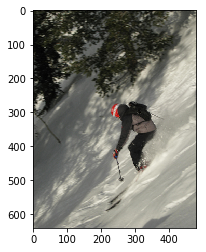

In [143]:
plt.imshow(img)

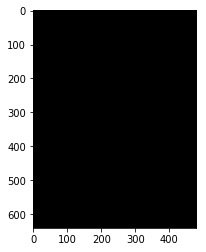

In [21]:
plt.imshow(mask_miss, cmap='gray')

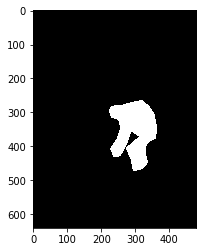

In [22]:
plt.imshow(mask_all, cmap='gray')

In [2]:
dp_list = []
ds = Data('train', True, debug=True)

loading annotations into memory...
Done (t=6.47s)
creating index...
index created!


In [3]:
ds.size()

2

In [4]:
ds.reset_state()

In [5]:
g = ds.get_data()

In [6]:
for _ in range(ds.size()):
    dp_list.append(next(g))

In [16]:
dp = dp_list[0]

In [17]:
len(dp)

4

In [18]:
img, heatmap, paf, mask = dp

In [19]:
img.shape

(368, 368, 3)

In [20]:
heatmap.shape

(46, 46, 19)

In [21]:
heatmap_shown = cv2.resize(heatmap[:,:, 1], (368, 368), interpolation=cv2.INTER_CUBIC)

In [25]:
np.max(heatmap_shown)

0.98316164837095421

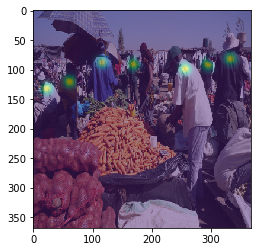

In [22]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.imshow(heatmap_shown, alpha=0.5)

In [36]:
heatmap.shape

(46, 46, 19)

In [26]:
heatmap_in_one = np.sum(heatmap[:,:,0:18], axis=2)

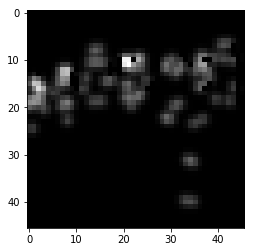

In [27]:
plt.imshow(heatmap_in_one, cmap='gray')

In [23]:
heatmap[:,:,-1]

array([[ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       ..., 
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.],
       [ 1.,  1.,  1., ...,  1.,  1.,  1.]])

In [40]:
mask.shape

(46, 46, 1)

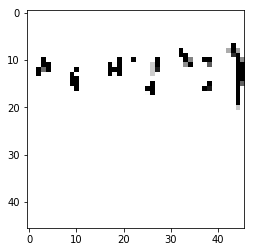

In [28]:
plt.imshow(mask, cmap='gray')

In [29]:
np.min(heatmap)

0.0

In [30]:
paf.shape

(46, 46, 38)

In [31]:
np.max(paf)

1.0